This is a _working_ notebook. See the `ccdControlIntro` notebook for a more narrative how-to. In this notebook, most cells have acquisition, processing, and plotting.

In [1]:
# All system imports
import logging
import time
import clocks
import fitsio

import numpy as np
import scipy
import scipy.optimize as opt

%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
import power.PCM as PCM
reload(PCM)

pcm = PCM.PCM(host='10.1.1.4')
pcm.logger.setLevel(logging.DEBUG)

In [4]:
def gobbleFeeOutput():
    while True:
        ret = fee.readResponse()
        print "got: ", ret
        if ret == '':
            break

def feeUp0():
    print "feeUp0"
    pcm.powerOn('fee')
    time.sleep(4)

def feeUp1():
    global fee
    print "feeUp1"
    logLevel = 20
    fee = feeMod.FeeControl(logLevel=logLevel)
    fee.powerUp(preset='erase')

def feeUp():
    feeUp0()
    feeUp1()
    
def feeBump():
    print "feeBump"

    pcm.powerCmd('fee', False)
    time.sleep(3)
    feeUp0()

def fullBump():
    feeUp1()
    time.sleep(1.5)
    fee.powerDown()
    time.sleep(1)
    pcm.powerOff('fee')
    
def V1():
    for m in ('erase', 'wipe', 'expose', 'read', 'erase'):
        fee.setMode(m)
        time.sleep(1)
        
def V0():
    feeUp0()
    feeUp1()
    fee.setMode('wipe')
    time.sleep(1)
    fee.setMode('expose')
    time.sleep(1)
    fee.setMode('read')
    ccd.readImage(nrows=40, ncols=100, 
                  clockFunc=pfsClocks, doSave=False)
    fee.setMode('erase')
    time.sleep(1)
#    fee.powerDown()
#    time.sleep(1)
    pcm.powerOff('fee')
    time.sleep(1)
    
#feeUp1()
#time.sleep(2)
#feeBump()
#print fee.doGet('voltage','54VP')


In [28]:
pcm.powerOff('fee')

#pcm.powerOn('fee')
#time.sleep(4)


Success


In [5]:
import testing.ampswitch as ampSwitch
reload(ampSwitch)

useAmpSwitch = False
if useAmpSwitch:
    pcm.powerCmd('ampSwitch', useAmpSwitch)

    try:
        switch.close()
    except:
        pass

    switch = ampSwitch.AmpSwitch(host='10.1.1.21')
    switch.readCoils()

In [29]:
# FEE connection and initialization.
# Initialize everything to some sane state.
import fee.feeControl as feeMod
reload(feeMod)

doLoad = False # '/home/pfs/feeMain-2015-09-11_01.hex'
doCalib = False

logLevel = 20
if doLoad:
    fee = feeMod.FeeControl(logLevel=logLevel, noPowerup=True)
    pcm.powerOff('fee')
    time.sleep(0.5)

    pcm.powerOn('fee')
    fee.sendImage(doLoad)

    time.sleep(2)
    pcm.powerCmd('fee', turnOn=False)
    time.sleep(1)
    pcm.powerCmd('fee', turnOn=True)
    time.sleep(4)
    fee = feeMod.FeeControl(logLevel=logLevel, noPowerup=True)
    fee.saveModesOnFee()
    fee.powerUp()
    
fee = feeMod.FeeControl(logLevel=logLevel)
    
if doCalib:
    fee.raw('lp,read')
    fee.raw('cal,CDS')
    fee.raw('cal,bias')
    #for channel in 0,1:
    #    fee.doSet('bias', 'P_off', -1.0, channel=channel) 
    #    fee.doSet('bias', 'S_off', -1.0, channel=channel)
    #    fee.doSet('bias', 'S_on', 3.0, channel=channel)
    fee.raw('sp,BT1')

    time.sleep(1)
    pcm.powerCmd('fee', turnOn=False)
    time.sleep(1)
    pcm.powerCmd('fee', turnOn=True)
    time.sleep(4)
    fee = feeMod.FeeControl(logLevel=logLevel)
    


SUCCESS
SUCCESS
SUCCESS


In [36]:
fee.logger.setLevel(20)
#gobbleFeeOutput()
#print fee.device.timeout
for i in range(1):
    ccd1 = fee.sendCommandStr('rt,ccd1')
    ccd0 = fee.sendCommandStr('rt,ccd0')
    print "%s %s" % (ccd0, ccd1)

print fee.sendCommandStr('rt,PA')
print fee.sendCommandStr('rt,FEE')

174.69 174.79
294.98
294.10


In [ ]:
fee.zeroOffsets()
defOffsets = np.array([-10]*8)
fee.setOffsets(np.arange(8), -defOffsets, leg='p')
fee.setOffsets(np.arange(8), defOffsets, leg='n')

In [26]:
%pdb off
fee.logger.setLevel(20)
fee.setMode('read')
t0 = time.time()
feeCards = fee.statusAsCards()
t1 = time.time()
fee.setMode('erase')

print "that took %0.3f s" % (t1-t0)
fee.printStatus()



Automatic pdb calling has been turned OFF
that took 2.236 s
bias.ch0.P_on :  -5.03
bias.ch0.P_off :  3.01
bias.ch0.DG_on :  -5.03
bias.ch0.DG_off :  4.99
bias.ch0.S_on :  -6.04
bias.ch0.S_off :  3.01
bias.ch0.SW_on :  -6.04
bias.ch0.SW_off :  5.03
bias.ch0.RG_on :  -7.57
bias.ch0.RG_off :  2.01
bias.ch0.OG :  -4.54
bias.ch0.RD :  -11.73
bias.ch0.OD :  -19.58
bias.ch0.BB :  28.62
bias.ch1.P_on :  -5.03
bias.ch1.P_off :  3.01
bias.ch1.DG_on :  -5.03
bias.ch1.DG_off :  4.99
bias.ch1.S_on :  -6.04
bias.ch1.S_off :  3.01
bias.ch1.SW_on :  -6.04
bias.ch1.SW_off :  5.03
bias.ch1.RG_on :  -7.57
bias.ch1.RG_off :  2.01
bias.ch1.OG :  -4.54
bias.ch1.RD :  -11.73
bias.ch1.OD :  -19.57
bias.ch1.BB :  28.5
voltage.3V3M :  3.3
voltage.3V3 :  3.3
voltage.5VP :  5.0
voltage.5VN :  -4.92
voltage.5VPpa :  5.03
voltage.5VNpa :  -4.98
voltage.12VP :  11.73
voltage.12VN :  -11.54
voltage.24VN :  -23.22
voltage.54VP :  49.86
offset.ch0.0p :  0.06
offset.ch0.1p :  0.03
offset.ch0.2p :  0.04
offset.ch0.3p :  

In [70]:
cmds = 'gb', 'rb'
chans = 'ch0', 'ch1'

fee.logger.setLevel(20)
for mode in 'erase', 'expose', 'read', 'wipe':
    fee.setMode(mode)

    print "======== %s" % mode
    
    for k in fee.allKeys('bias'):
        print "%-8s " % k,
        for chan in chans:
            for cmd in cmds:
                v = fee.sendCommandStr('%s,%s,%s' % (cmd, k, chan))
                print "%6s " % (v),
            print "    ",
        print
    
fee.setMode('erase')


======== erase
P_on        6.00    5.99         6.00    5.99      
P_off       6.00    5.99         6.00    5.99      
DG_on       6.00    5.99         6.00    5.99      
DG_off      6.00    5.99         6.00    5.99      
S_on        6.00    5.99         6.00    5.99      
S_off       6.00    5.99         6.00    5.99      
SW_on       6.00    5.99         6.00    5.99      
SW_off      6.00    6.04         6.00    6.04      
RG_on       6.00    6.00         6.00    6.00      
RG_off      6.00    6.00         6.00    6.00      
OG          6.00    6.00         6.00    5.99      
RD        -12.00  -11.73       -12.00  -11.73      
OD         -5.00   -4.76        -5.00   -4.75      
BB          0.20    0.00         0.20    0.00      
======== expose
P_on       -5.00   -5.03        -5.00   -5.03      
P_off       3.00    3.01         3.00    3.01      
DG_on      -5.00   -5.03        -5.00   -5.03      
DG_off      5.00    4.99         5.00    4.99      
S_on       -6.00   -6.04        -

In [128]:
if True:
    fee.device.setTimeout(2.0)
    print fee.saveModesToFee()
    fee.device.setTimeout(0.5)

None


In [27]:
if False:
    print fee.doGet('serial', 'FEE')
    fee.unlockConfig()
    fee.setSerial('ADC', 3063060)
    fee.setSerial('PA0', 186)
    fee.lockConfig()
print fee.doGet('serial', 'FEE')
print fee.doGet('serial', 'ADC')
print fee.doGet('serial', 'PA0')


3060356
3063060
186


In [71]:
# FPGA connection and initialization.
# All the reloads are to make sure that new code gets picked up
import fpga as fpgaMod
import fpga.ccdFuncs as ccdFuncs
import fpga.nbFuncs as nbFuncs

reload(fpgaMod)
reload(fpgaMod.ccd)
reload(fpgaMod)

ccd = fpgaMod.CCD(adc18bit=1)  # adc18bit=2 reads the low bits.
ccd.pciReset()
print "FPGA version: 0x%08x" % (ccd.peekWord(0))

FPGA version: 0xbeefa070


In [72]:
# Load the clock tables. pfsClocks is used for each readout.
import clocks_001
import clocks_002
import clocks
reload(clocks_001)
reload(clocks_002)
reload(clocks)

pfsClocks = clocks_002.readClocks
pre, pix, post = pfsClocks()


0100 140.7 117.5 113.7 116.3 105.4 108.3 126.8 100.7 0.56 0.54 0.56 0.71 0.56 0.70 0.81 0.56 OK
0199 140.9 117.5 113.7 116.2 105.4 108.3 126.8 100.7 0.55 0.58 0.57 0.71 0.55 0.73 0.81 0.56 OK
0100 140.7 117.4 113.6 116.2 105.4 108.4 126.9 100.7 0.57 0.54 0.56 0.70 0.58 0.67 0.78 0.54 OK
0199 140.8 117.5 113.7 116.2 105.4 108.4 127.0 100.8 0.58 0.57 0.54 0.72 0.56 0.70 0.80 0.50 OK
means(0.000): [140.7754 117.4538 113.6004 116.2405 105.3648 108.3434 126.8279 100.7194]
devs (0.000): [0.5609 0.5743 0.5805 0.7019 0.5618 0.7090 0.8022 0.5616]

0100 62914.9 62857.2 62864.8 62870.3 62843.6 62874.3 62871.9 62845.7 0.54 0.58 0.57 0.72 0.56 0.75 0.82 0.61 OK
0199 62914.9 62857.2 62864.7 62870.2 62843.6 62874.3 62871.7 62845.7 0.51 0.54 0.56 0.72 0.57 0.72 0.80 0.57 OK
means(39.800): [62914.9056 62857.2839 62864.8067 62870.3323 62843.5418 62874.3719 62871.8288 62845.7609]
devs (39.800): [0.5382 0.5679 0.5979 0.7472 0.5739 0.7254 0.8030 0.5697]

0100 60154.0 60062.0 60081.0 60090.0 60046.8 60104.9

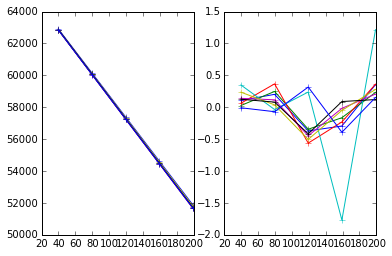

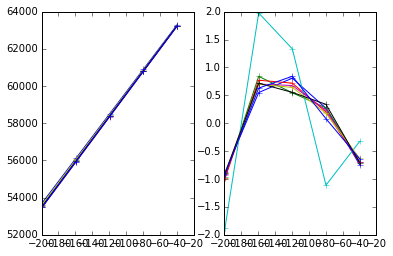

In [75]:
reload(nbFuncs)

doGainCurve = True
if doGainCurve:
    fee.zeroOffsets()
    stepSize = 19.9*2
    statCols = slice(5,None)
    amps = np.arange(8)
    noffsets, nlevels = nbFuncs.gainCurve(ccd, fee, amps=amps, stepSize=stepSize, leg='n', 
                                          statCols=statCols, doUnwrap=65000)
    poffsets, plevels = nbFuncs.gainCurve(ccd, fee, amps=amps, stepSize=-stepSize, leg='p', 
                                          statCols=statCols, doUnwrap=65000)
    
    print
    nfits = nbFuncs.plotGains(noffsets, nlevels, amps=amps)
    print
    pfits = nbFuncs.plotGains(poffsets, plevels, amps=amps)

In [22]:
%pdb off
reload(ccdFuncs)
reload(nbFuncs)

allAmps = np.arange(8)
badAmps = []

dummyCcd = False
if not dummyCcd:
    goodAmps = np.arange(8)

    startStep = 5
    levels = 1000
else:
    goodAmps = np.arange(4) + 4
    
    startStep = 10
    levels = np.zeros(8)
    levels[4:] = [10000,25000,20000,15000]

ncols=300

doTune = False
if doTune:
    offs, devs, gains = nbFuncs.tuneLevels(ccd, fee, levels=levels, adjOffset=5, 
                                           amps=goodAmps,
                                           statCols=slice(2,None), 
                                           maxLoops=10, nrows=200, 
                                           startStep=startStep, 
                                           startOffset=startStep,
                                           sigTol=4, 
                                           clockFunc=pfsClocks, 
                                           legs='np', # useGains=nfits[:,0], 
                                           doZero=True, doUnwrap=65000)

    defOffsets = offs


Automatic pdb calling has been turned OFF


0099 37619.2 34235.2 30318.2 20811.4 37901.4 33834.8 29943.7 20456.5 1.97 1.73 1.72 0.82 27.03 27.13 26.10 20.36 OK
0299 37631.3 34247.6 30325.1 20812.1 37913.2 33849.9 29951.7 20456.2 2.09 1.81 1.87 1.47 29.95 30.20 29.67 25.21 OK
means: [37631.611 34247.528 30325.017 20812.378 37912.337 33848.968 29951.265 20455.952]
devs:  [3.044 2.566 2.704 1.595 29.356 29.400 28.416 23.623]
peak:  37910.0 35883 37993 83.0 276.666666667 0.00361445783133
file: /data/pfs/2015-09-09/PFSA-00001415.fits


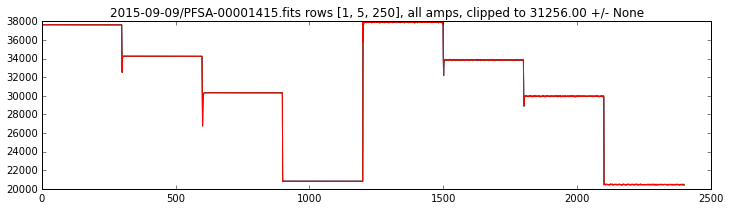

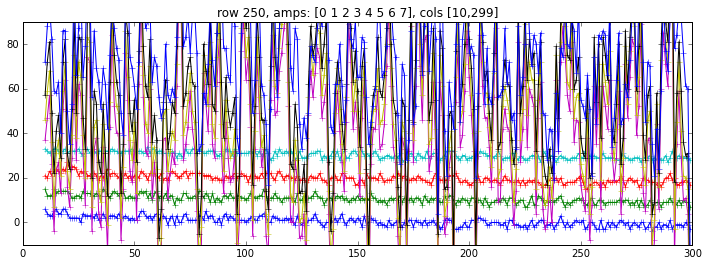

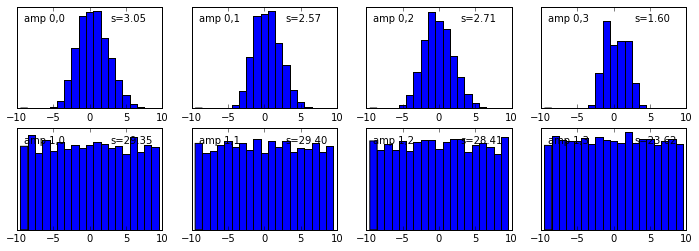

/home/pfs/hostdevel/fullAnaconda/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


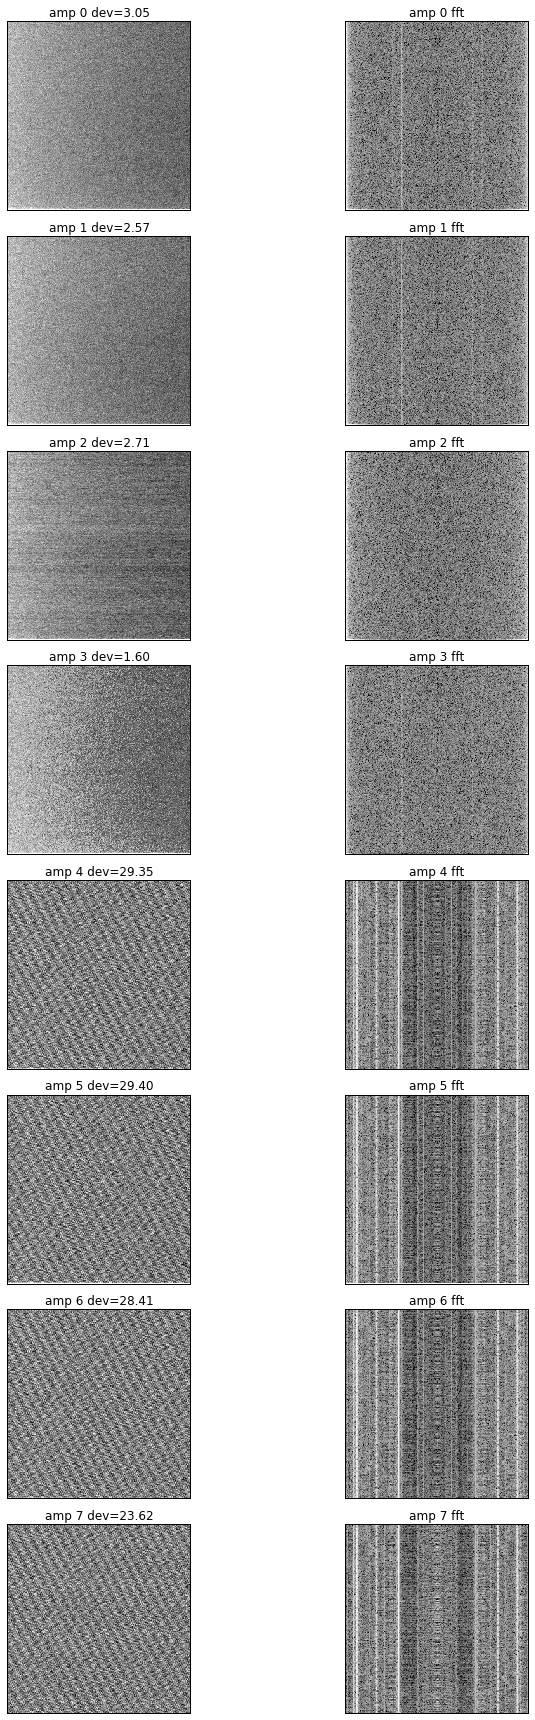

In [73]:
reload(ccdFuncs)
reload(nbFuncs)

fee.setMode('erase')

# fee.sendCommandStr('sf,slow')

goodAmps = np.arange(8) #[3,4,5,6, 7] # np.arange(8)
badAmps = []

nrows = 300                # How many rows to read out.
ncols = 300
selectRows = slice(0,500)
selectCols = None # slice(5,5)
pcols = np.arange(10,ncols)    # Which cols to plot
statCols = np.arange(10,ncols) # Which cols to use for stats
prow = (selectRows.stop+1)/2
prows = [1, 5, prow]       # which rows to plot
fftAmps = []

figWidth = 12

argDict = dict(everyNRows=300, ampList=goodAmps, cols=statCols, ccd=ccd)

siggenAmp = None
if siggenAmp is None:
    try:
        switch.setCoils(off=range(16))
    except:
        pass
else:
    switch.chooseCoil(siggenAmp)

comment = 'pure test'
flushRead = True
doFile = None # '/data/pfs/2015-06-02/PFSA-00000954.fits'
doSave = True
if doFile:
    im = fitsio.read(doFile)
else:
    fee.setMode('read')
    time.sleep(1)
    if flushRead:
        im, files = ccd.readImage(nrows=100, ncols=ncols, 
                                  rowFunc=ccdFuncs.rowStats, rowFuncArgs=argDict, 
                                  clockFunc=pfsClocks, doSave=False)
    im, files = ccd.readImage(nrows=nrows, ncols=ncols, 
                              rowFunc=ccdFuncs.rowStats, rowFuncArgs=argDict, 
                              clockFunc=pfsClocks, doSave=doSave,
                              comment=comment, addCards=feeCards)
    fee.setMode('erase')

if selectRows is not None:
    im = im[selectRows]
if selectCols is not None:
    im = im[:,selectCols]
    
im = im.astype('i4')
hi_w = np.where(im > 63000)
im[hi_w] -= 65535

if siggenAmp is None:
    amp4Mask = ccd.ampidx(4, im)
else:
    amp4Mask = ccd.ampidx(siggenAmp, im)

#amp6Mask = ccd.ampidx(6, im)
#im[:, amp6Mask] -= im[:, amp6Mask].mean()
#im[:, amp6Mask] += im[:, ccd.ampidx(4, im)].mean()

means,devs = nbFuncs.ampStats(im, ccd=ccd, cols=statCols)
print "means:", nbFuncs.fmtArr(means, format="%0.3f")
print "devs: ", nbFuncs.fmtArr(devs, format="%0.3f")
med4 = np.median(im[prow, amp4Mask])
max4 = np.max(im[prow, amp4Mask])
min4 = np.min(im[prow, amp4Mask])

inject = 0.3
print "peak: ", med4, min4, max4, max4-med4, (max4-med4)/inject, inject/(max4-med4)

# print "shape: %s dtype: %s" % (str(im.shape), im.dtype)
    
if len(files) > 0:
    path = files[0]
    imName = '/'.join(path.split('/')[-2:])
    print "file: %s" % (path)

#focusAmp = 0             # Which amp to focus on
#focusMask = ccd.ampidx(focusAmp, im)[pcols]

# plot one or more rows across the entire image
nbFuncs.plotRows(im, prows, imName=imName, figWidth=figWidth, pixRange=200 if siggenAmp is not None else None)

# plot one row for each the "good" amps
peaks = None # np.arange(1, ncols, 50)
if siggenAmp is not None:
    channel = siggenAmp/4
    amps0 = [siggenAmp]
    amps1 = goodAmps[np.where((goodAmps/4 == channel) & (goodAmps != siggenAmp))]
    amps2 = goodAmps[np.where(goodAmps/4 != channel)]

    nbFuncs.plotAmps(im, amps=amps0, row=prow, cols=pcols, 
                 plotOffset=10, fig=None, figWidth=figWidth, 
                 peaks=peaks, clipPeaks=True)

    nbFuncs.plotAmps(im, amps=amps1, row=prow, cols=pcols, 
                 plotOffset=100, fig=None, figWidth=figWidth, 
                 peaks=peaks, clipPeaks=True)

    nbFuncs.plotAmps(im, amps=amps2, row=prow, cols=pcols, 
                 plotOffset=10, fig=None, figWidth=figWidth)
else:
    nbFuncs.plotAmps(im, amps=goodAmps, row=prow, cols=pcols, 
                     plotOffset=10, fig=None, figWidth=figWidth, 
                     peaks=peaks, clipPeaks=True)

# f.axes[0].set_ylim(-50, 150)

# plot any bad amps individually
for a in badAmps:
    nbFuncs.plotAmps(im, amps=[a], row=prow, cols=pcols, figWidth=figWidth)

# show a grid of histograms.
hists = nbFuncs.ampHistGrid(im, ccd, cols=pcols, histRange=20, figWidth=figWidth)

# show a grid of raw amp images.
nbFuncs.rawAmpGrid(im, ccd, cols=pcols, figWidth=figWidth, showFfts=True)

fftAmps = [] # np.arange(8) # [1,2,5] # [5,6]
if len(fftAmps) > 0:    
    
    fftFig = plt.figure(figsize=(figWidth, figWidth/4))
    for a in fftAmps:
        fftFig = plt.figure(figsize=(figWidth, figWidth/4))
        fftMask = ccd.ampidx(a, im)[pcols]
        ampSeg = im[prow,fftMask]
        freqs, fft, peak_ii = ccdFuncs.plotTopPeriods(ampSeg, topN=3)


#fig.colorbar(pp)
#plt.tight_layout()